In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("../used_car_train_20200313.csv",encoding='unicode_escape',sep=" ")

In [3]:
# train_data['model'].mode()[0]
# 0.0
# test['model'].isnull().sum()
# 0 
train_data['bodyType'].value_counts()
"""
0.0    41420
1.0    35272
2.0    30324
3.0    13491
4.0     9609
5.0     7607
6.0     6482
7.0     1289
Name: bodyType, dtype: int64
"""
# 补纵数
train_data['bodyType'].fillna(train_data['bodyType'].mode()[0],inplace=True)

In [4]:
# test['bodyType'].isnull().sum()
# # 1504
# # 纵数补全
# test['bodyType'].fillna(test['bodyType'].mode()[0],inplace=True)

In [5]:
train_data['fuelType'].value_counts()
"""
0.0    91656
1.0    46991
2.0     2212
3.0      262
4.0      118
5.0       45
6.0       36
Name: fuelType, dtype: int64
"""
train_data['fuelType'].fillna(train_data['fuelType'].mode()[0],inplace=True)
# test['fuelType'].fillna(test['fuelType'].mode()[0],inplace=True)

In [6]:
train_data['gearbox'].value_counts()
"""
0.0    111623
1.0     32396
Name: gearbox, dtype: int64
"""
train_data['gearbox'].fillna(train_data['gearbox'].mode()[0],inplace=True)
# test['gearbox'].fillna(test['gearbox'].mode()[0],inplace=True)

In [7]:
#查看数据缺失值
temp = train_data.isnull().sum()
#temp
# 得到 model  1
train_data['model'].value_counts()
train_data['model'].fillna(train_data['model'].mode()[0],inplace=True)
train_data.isnull().sum()
#temp = pd.DataFrame(temp)
#temp = temp.reset_index()
#temp = temp[temp[0] > 0]  # 只筛过程

SaleID               0
name                 0
regDate              0
model                0
brand                0
bodyType             0
fuelType             0
gearbox              0
power                0
kilometer            0
notRepairedDamage    0
regionCode           0
seller               0
offerType            0
creatDate            0
price                0
v_0                  0
v_1                  0
v_2                  0
v_3                  0
v_4                  0
v_5                  0
v_6                  0
v_7                  0
v_8                  0
v_9                  0
v_10                 0
v_11                 0
v_12                 0
v_13                 0
v_14                 0
dtype: int64

In [8]:
# test.isnull().sum()
# test缺失也无了

In [9]:
# 通过筛选 得出：model, bodyType, fullType, gearbox存在缺失值
#train_data['SaleID'].value_counts()  # 都是1
#train_data['SaleID'].nunique()  # 150000
train_data.shape  # (150000, 31)
# SaleID 从0 到15000，对于模型没有价值，如果SaleID有些特征生成，比如按照时间作为SaleID可以保留，有一定价值。


(150000, 31)

In [10]:
#缺失值筛选
# temp.plot.bar()

<AxesSubplot:>

<Figure size 864x576 with 0 Axes>

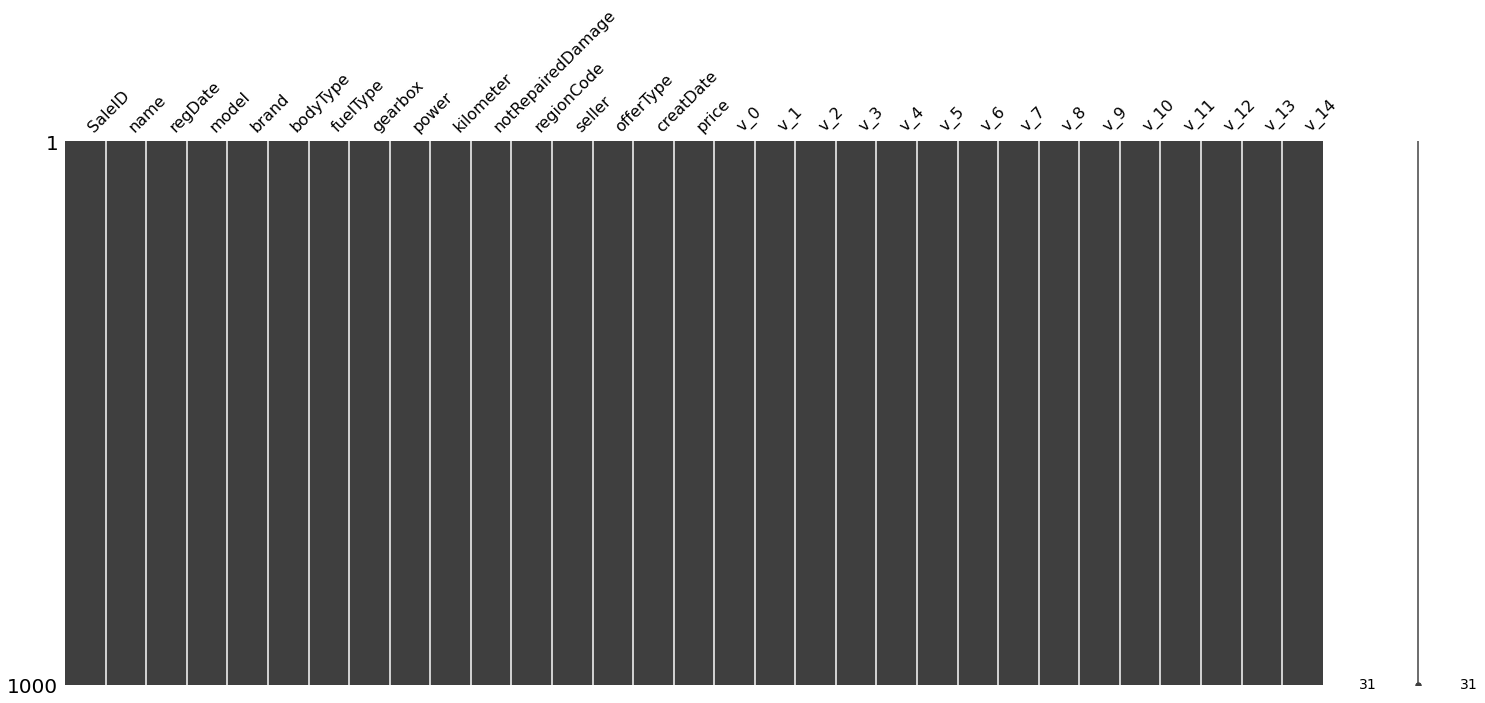

In [11]:
# 缺失值Null 可视化
import matplotlib.pyplot as plt
import missingno as msno # 专做缺失值可视化 专门工具

plt.figure(figsize=(12,8))  # 设定figsize
sample = train_data.sample(1000)  # 抽样可视化
#sample
msno.matrix(sample)  # 中间亮条表示缺失值（纵的列的缺失值）， 上边：整个特征；右侧：密度 （行的缺失值）

<AxesSubplot:>

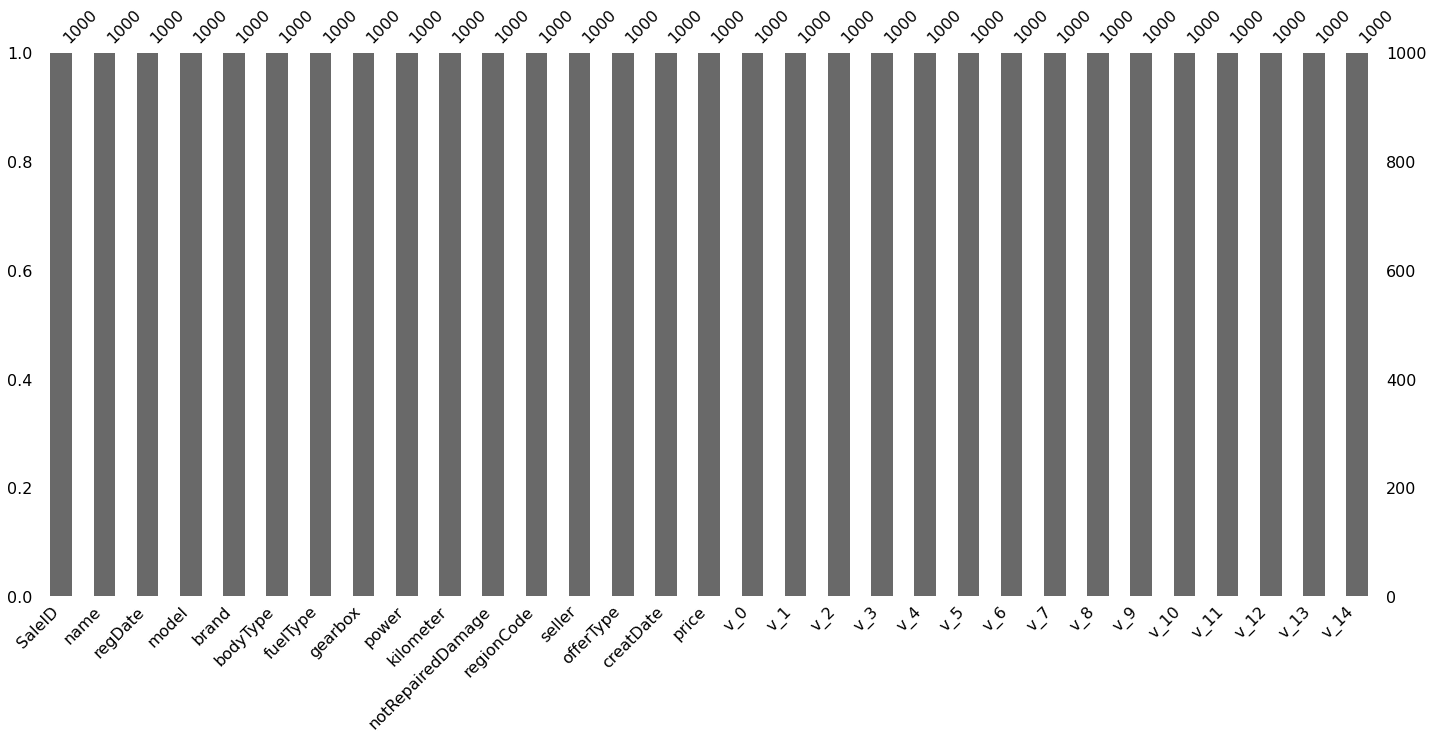

In [12]:
msno.bar(sample)  # 呈现 频数
# 查看缺失值目的： 需要知道哪些缺失值数据要处理，了解特征情况，方便对数据了解。

/Users/edz/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:311: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/Users/edz/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:311: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<AxesSubplot:>

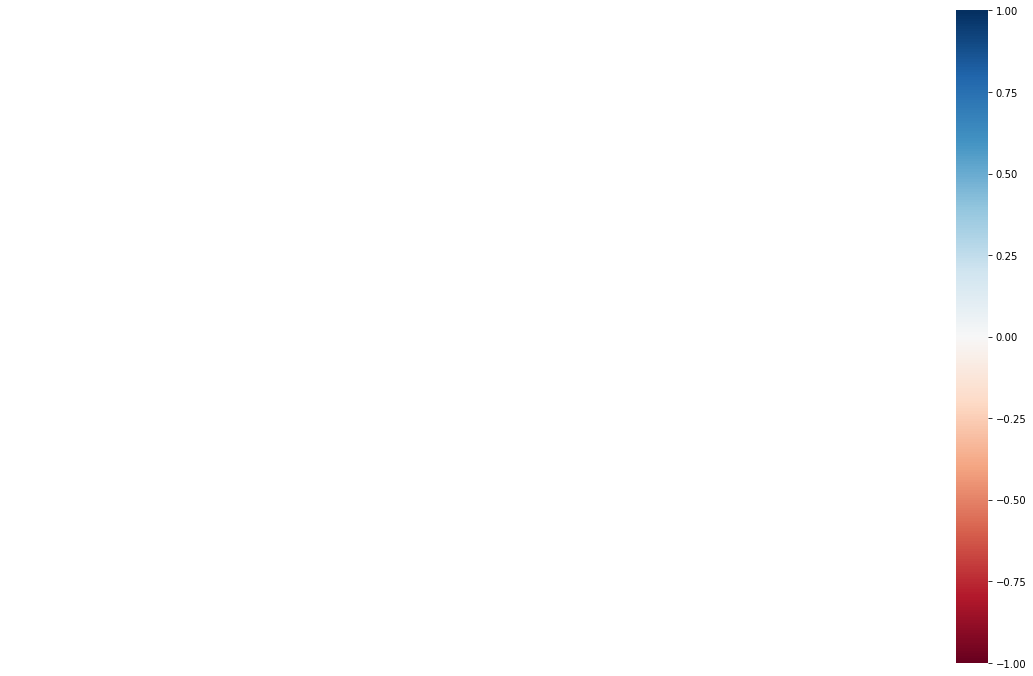

In [13]:
msno.heatmap(sample) #热力图， 缺失值相关的一些关系。

In [14]:
# 查看数据集的大小
print('训练集大小：', train_data.shape)
# print('测试机大小：', test.shape)

训练集大小： (150000, 31)


/Users/edz/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'johnsonsu'}, xlabel='price'>

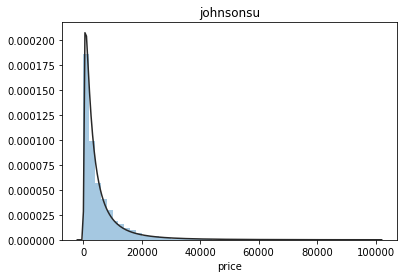

In [15]:
# 数据探索后，查看分布，price的分布
import seaborn as sns
import scipy.stats as st
y = train_data['price']
plt.title('johnsonsu')
sns.distplot(y, kde=False, fit=st.johnsonsu) # kde：是否显示和密度；fit：使用什么分布
# 数据分布符合，拟合

/Users/edz/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Normal'}, xlabel='price'>

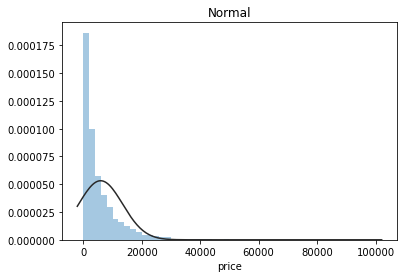

In [16]:
plt.title('Normal') # 正态分布
sns.distplot(y, kde=False, fit=st.norm)
#

/Users/edz/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Log Normal'}, xlabel='price'>

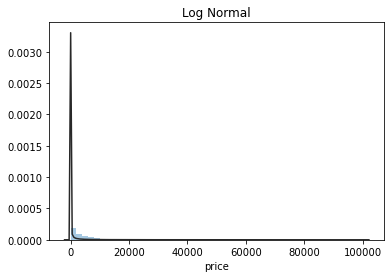

In [17]:
plt.title('Log Normal') #  分布
sns.distplot(y, kde=False, fit=st.lognorm)
# 拟合后看线

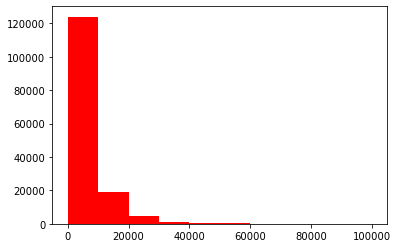

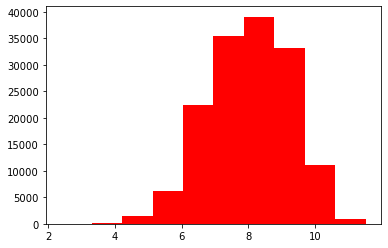

In [18]:
# 直方图展示
import numpy as np
plt.hist(train_data['price'], color='red')
plt.show()
plt.hist(np.log(train_data['price']), color='red')
plt.show()

/Users/edz/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 3.346487
Kurtosis: 18.995183


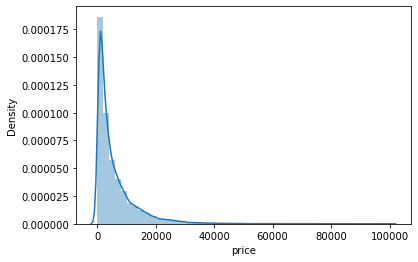

In [19]:
# 偏度与峰度
sns.distplot(train_data['price'])
print("Skewness: %f" % train_data['price'].skew())
print("Kurtosis: %f" % train_data['price'].kurt())

<AxesSubplot:>

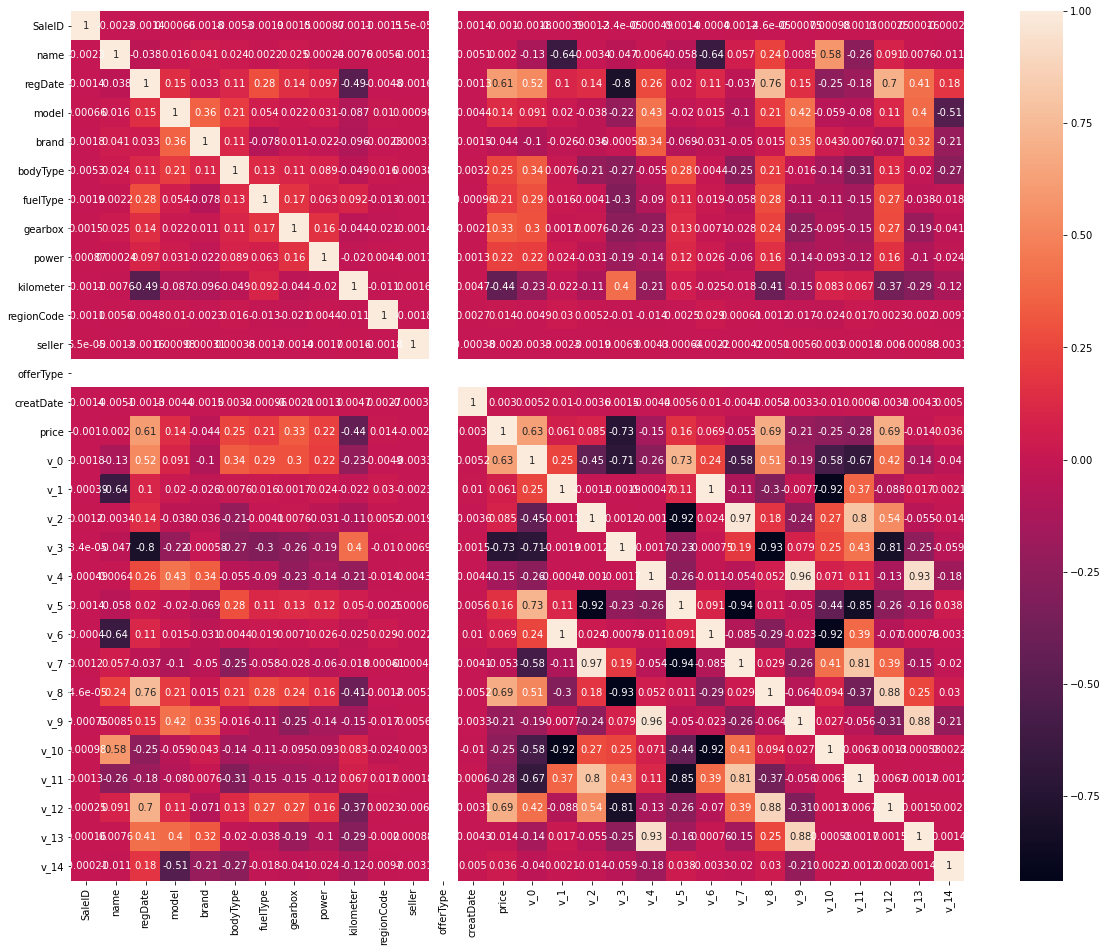

In [20]:
plt.figure(figsize=(20,16))
sns.heatmap(train_data.corr(), annot=True) # annot=True 显示数字

In [21]:
temp = train_data.corr()
temp[np.abs(temp['price']) >=0.5]['price']

regDate    0.611959
price      1.000000
v_0        0.628397
v_3       -0.730946
v_8        0.685798
v_12       0.692823
Name: price, dtype: float64

In [22]:
#train_data.info()
# 分析 offertype
train_data['offerType'].value_counts()
# offerType都是0， 可以去掉

0    150000
Name: offerType, dtype: int64

In [23]:
# 上面数据探索完毕
# 如下：一行代码生成数据报告
# import pandas_profiling as pp
# report = pp.ProfileReport(train_data)
# # 导出为html,方便浏览
# report.to_file('report.html')

In [24]:
# 继续探索
train_data['notRepairedDamage'].value_counts()
#0.0    111361
#-       24324
#1.0     14315
#Name: notRepairedDamage, dtype: int64 

#发现有 - ： 有缺失值，需要取补全

#train_data['notRepairedDamage'].describe()

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64

In [25]:
# 补全：纵数补全
# 方法：
# 方法1： train_data['notRepairedDamage'].mode()[0]
'''
0    0.0
dtype: object
'''
# 方法2：
train_data['notRepairedDamage'].replace('-', '0.0', inplace=True)

In [26]:
# 查看测试集的缺失值
# test['notRepairedDamage'].value_counts()
# test['notRepairedDamage'].replace('-', '0.0', inplace=True)

In [27]:
# 查看数值类型
#train_data.info() # 找到非字符串类型
numerical_cols = train_data.select_dtypes(exclude='object').columns # dtype搜type型号
numerical_cols

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'regionCode', 'seller', 'offerType',
       'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6',
       'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14'],
      dtype='object')

In [28]:
#查看分类类型
categorical_cols = train_data.select_dtypes(include='object').columns # dtype搜type型号
categorical_cols
# 得到： Index(['notRepairedDamage'], dtype='object')  notRepairedDamage已经改为0,1

Index(['notRepairedDamage'], dtype='object')

In [29]:
train_data['regDate'].value_counts()
#得到大的数值，是时间

20000008    180
20000011    158
20000004    157
20000010    157
20000002    155
           ... 
19910807      1
19910902      1
20151209      1
19911011      1
20151201      1
Name: regDate, Length: 3894, dtype: int64

In [30]:
# 第一版的特征选择，去掉不用的字段, 第一版时可以不考虑时间
drop_cols = ['SaleID', 'regDate', 'creatDate', 'offerType', 'price',"notRepairedDamage"]
feature_cols = [col for col in train_data.columns if col not in drop_cols]
feature_cols
#得到 所有需要建模的特征

['name',
 'model',
 'brand',
 'bodyType',
 'fuelType',
 'gearbox',
 'power',
 'kilometer',
 'regionCode',
 'seller',
 'v_0',
 'v_1',
 'v_2',
 'v_3',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14']

In [31]:
# 提取特征列
X_train_data = train_data[feature_cols]
Y_train_data = train_data['price']
# X_test = test[feature_cols]
#test里没有 y

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_data,Y_train_data,test_size=0.3)

In [33]:
# 定义一个统计函数，用于统计某字段的的特征，统计特征
# def show_stats(data):
#     print('min: ', np.min(data))
#     print('max: ', np.max(data))
#     # ptp = max - min  区间范围
#     print('ptp: ', np.ptp(data))
#     print('mean: ', np.mean(data))
#     print('std: ', np.std(data))
#     print('var: ', np.var(data))
# # 查看price
# show_stats(Y_data)

In [34]:
# 去掉warnings
# import warnings
# warnings.filterwarnings('ignore')
# #X_data.info()
# X_data['notRepairedDamage'] = X_data['notRepairedDamage'].astype('float64')
# X_test['notRepairedDamage'] = X_test['notRepairedDamage'].astype('float64')

In [35]:
#建模， 使用XGBoost建模
# import xgboost as xgb
# 创建模型， 使用的sklearn版本。
#model = xgb.XGBRegressor(n_estimator=150, learning_rate=0.01, game=0, subsample=0.8, colsample_bytree=0.8, masx_depth=7， random_state=2021)
# 祖传参数: xgboost参数多，先做baseline
#tree_method='gpu_hist', eval_metric='auc', 
# model = xgb.XGBRegressor(max_depth=6, learning_rate=0.05, n_estimators=2000, 
#                          objective='reg:linear', 
#                          subsample=0.8, colsample_bytree=0.8,
#                          min_child_samples=3, reg_lambda=0.5)
# model.fit(X_data, Y_data)
# gpu_id: 没用GPU， n_estimator：最主要的参数，迭代的次数；learning_rate:梯度的步长，masx_depth：树的深度；
# scale_pos_weight： 正负样本; m_job:运行处理； 一个线程；subsample：行采样。

In [74]:
#xgboost模型参数调优
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from hyperopt import hp,tpe,fmin
N_FOLDS = 5
iteration = 0
MAX_EVALS = 30
def objective(params,n_folds=N_FOLDS):
    subsample = params['boosting_type'].get('subsample', 1.0)
    params['boosting_type'] = params['boosting_type']['boosting_type']
    params['subsample'] = subsample
    model = lgb.LGBMRegressor(**params)
    model.fit(X_train,y_train,eval_set=[(X_val,y_val)],early_stopping_rounds = 50)
    y_pred_val = model.predict(X_val)
    val_loss = mean_squared_error(y_val,y_pred_val)
    return val_loss
    
#参数空间
params_lgb = {
     'boosting_type': hp.choice('boosting_type', 
     [{'boosting_type': 'gbdt', 'subsample': hp.uniform('gdbt_subsample', 0.5, 1)}, 
     {'boosting_type': 'dart', 'subsample': hp.uniform('dart_subsample', 0.5, 1)},
     {'boosting_type': 'goss', 'subsample': 1.0}]),
    "learning_rate":hp.loguniform("learning_rate",np.log(0.01),np.log(0.5)),
    "max_depth": hp.randint("max_depth",40) + 10,
    "gamma": hp.quniform("gamma",0.1,1,0.1),
    "colsample_bytree":hp.uniform("colsample_bytree",0.6,1.0),
    'n_estimators':hp.randint("n_estimators",18000) + 2000,
}

#优化算法
tpe_algorithm = tpe.suggest

#结果追踪
# bayes_trials = Trials()

#自动参数调优
lgb_best = fmin(fn = objective, space = params_lgb, algo = tpe.suggest, max_evals = MAX_EVALS)

[1]	valid_0's l2: 5.10977e+07                         
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l2: 4.71624e+07                         
[3]	valid_0's l2: 4.3547e+07                          
[4]	valid_0's l2: 4.02324e+07                         
[5]	valid_0's l2: 3.71952e+07                         
[6]	valid_0's l2: 3.43989e+07                         
[7]	valid_0's l2: 3.18712e+07                         
[8]	valid_0's l2: 2.95416e+07                         
[9]	valid_0's l2: 2.74136e+07                         
[10]	valid_0's l2: 2.54677e+07                        
[11]	valid_0's l2: 2.36474e+07                        
[12]	valid_0's l2: 2.19814e+07                        
[13]	valid_0's l2: 2.0482e+07                         
[14]	valid_0's l2: 1.90873e+07                        
[15]	valid_0's l2: 1.7807e+07                         
[16]	valid_0's l2: 1.66462e+07                        
[17]	valid_0's l2: 1.55902e+07                        
[18]

KeyboardInterrupt: 

In [ ]:
# y_pred = model.predict(X_test)
# y_pred

In [ ]:
# 可能不准：训练 欠拟合 => n_estimators太小，或者 learning_rate太小
show_stats(y_pred)

In [ ]:
# 出现负数： 因为XGBoost是集成学习，多棵树组成
# 有些树的叶子节点 有可能为负
# 处理：变成0，
# result = pd.DataFrame()
# result['SaleID'] = test['SaleID']
# result['price'] = y_pred
# result[result['price'] < 0] = 11 # 小于0的 赋成最小值
# result

In [ ]:
# result.to_csv('./baseline_xgb2.csv', index=False)